In [1]:
from PIL import Image
import numpy as np
from matplotlib.image import pil_to_array
import healpy as hp
import matplotlib.pyplot as plt
import time
import warnings
from pixell import reproject
import ST


In [2]:
nside = 128
lmax = 3*nside - 1 
res_rad = hp.nside2resol(nside , arcmin = False)
res_arcmin = hp.nside2resol (nside, arcmin= True)
ell=np.arange(0,lmax)
mapsize = hp.nside2npix(nside)
almsize = hp.Alm.getsize(lmax)

In [3]:
jmax = 9
theta_bin = 10000

# 1-Directly defining the morlet function on a sphere

In [4]:
mor_map = np.zeros(mapsize)
ids = np.arange (mapsize)
theta_arr, phi_arr = hp.pix2ang (nside, ids)

In [5]:
mor_arr = []
for j in range (jmax):
    sigma = (0.8*res_rad*2**j)
    freq =(3.0*np.pi) /(4.0*res_rad*2**j)
    mor = ST.morlet(freq, sigma, theta_arr, lmax)
    mor_arr.append(mor)



/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1242: ComplexWarning: Casting complex values to real discards the imaginary part
  window[0] = trapz(beam * p0 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1243: ComplexWarning: Casting complex values to real discards the imaginary part
  window[1] = trapz(beam * p1 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1247: ComplexWarning: Casting complex values to real discards the imaginary part
  window[l] = trapz(beam * p2 * st, theta)


<ipython-input-26-e1097a4cf1f0>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  mor_map[ids] = mor_arr[j]


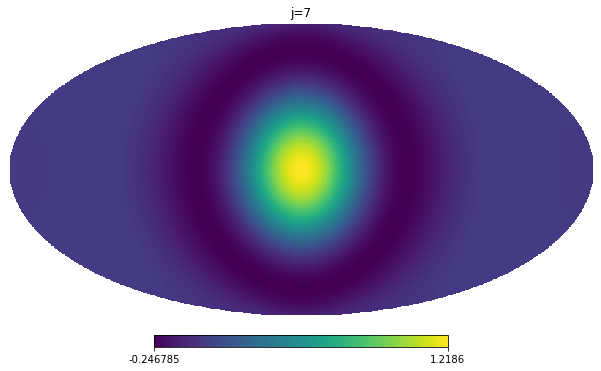

In [26]:
j = 7
mor_map[ids] = mor_arr[j]
mapp = hp.mollview(mor_map, rot=[0,90], title="j=%d"%j )
plt.savefig("Morlet_map_2.pdf")

In [27]:
morlet_l_arr = ST.morlet_arr(res_rad, jmax, lmax, theta_bin)

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1242: ComplexWarning: Casting complex values to real discards the imaginary part
  window[0] = trapz(beam * p0 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1243: ComplexWarning: Casting complex values to real discards the imaginary part
  window[1] = trapz(beam * p1 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1247: ComplexWarning: Casting complex values to real discards the imaginary part
  window[l] = trapz(beam * p2 * st, theta)


In [7]:
alm_list = []
for j in range (jmax):
    alm_list.append( hp.map2alm(mor_arr[j]))

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:268: ComplexWarning: Casting complex values to real discards the imaginary part
  alms = _sphtools.map2alm(


In [8]:
np.where (alm_list[7][lmax+1:]>0.001)

(array([], dtype=int64),)

# Definition of delta function on sphere

In [9]:
theta0 = 0 
phi0 = 0 

In [10]:
ids = np.arange (0,mapsize)
theta_arr , phi_aarr = hp.pix2ang(nside, ids)

In [11]:
pix0 = hp.ang2pix (nside, theta0, phi0)

In [12]:
from scipy import signal
map_delta = signal.unit_impulse(mapsize, pix0)/np.sin(theta_arr)
map_delta[pix0] = 1

In [13]:
np.where (hp.map2alm(map_delta)[lmax+1:]>0.0001)

(array([], dtype=int64),)

In [18]:
morlet_l_arr = ST.morlet_arr(res_rad , jmax , lmax , theta_bin)

In [19]:
s1_delta, i1_delta = ST.compS1(map_delta, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


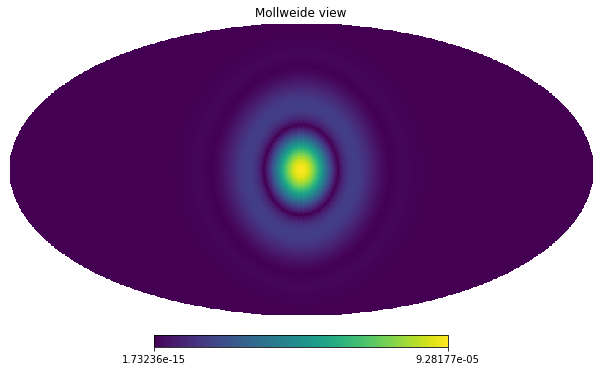

In [20]:
hp.mollview(i1_delta[6], rot=[0,90])

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/projector.py:201: ComplexWarning: Casting complex values to real discards the imaginary part
  img[w] = mpix


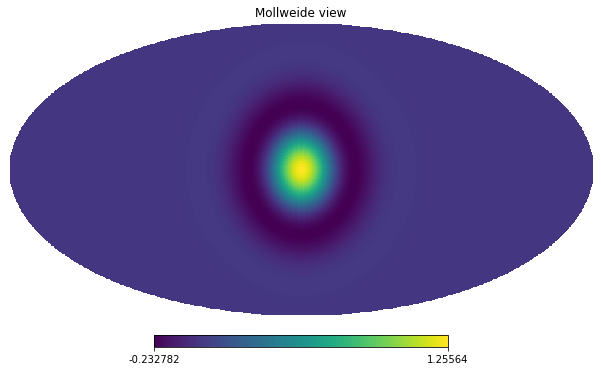

In [21]:
hp.mollview(mor_arr[6], rot =[0,90])

# My definition of a delta function

In [167]:
my_alm = np.zeros (almsize , dtype=np.complex128)
my_alm [0:lmax+1] = 1+0.j

In [168]:
my_delta_map = hp.alm2map(my_alm, nside)

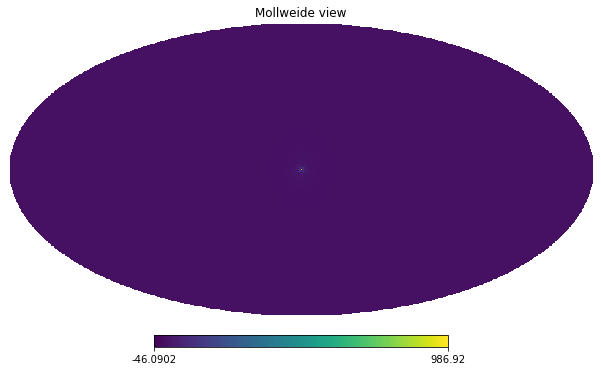

In [169]:
hp.mollview(hp.alm2map(my_alm, nside), rot = [0,90])

In [179]:
s1_my_delta, i1_my_delta = ST.compS1(my_delta_map, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


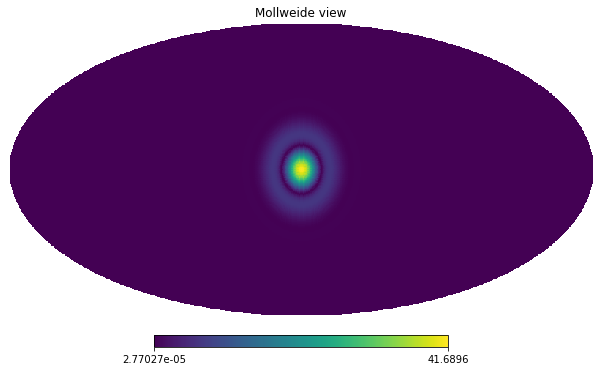

In [180]:
hp.mollview(i1_my_delta[5], rot = [0,90])

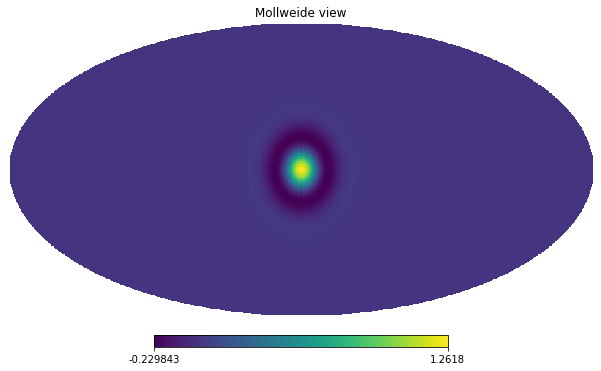

In [182]:
hp.mollview(mor_arr[5], rot=[0,90])

# Another delta 

In [22]:
myother_alm = np.zeros (almsize , dtype=np.complex128)
for l in range (lmax+1):
    myother_alm [l] = 1
myother_delta_map = hp.alm2map(myother_alm, nside)

In [23]:
myother_alm

array([1.+0.j, 1.+0.j, 1.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

In [24]:
s1_myother_delta, i1_myother_delta = ST.compS1(myother_delta_map, morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


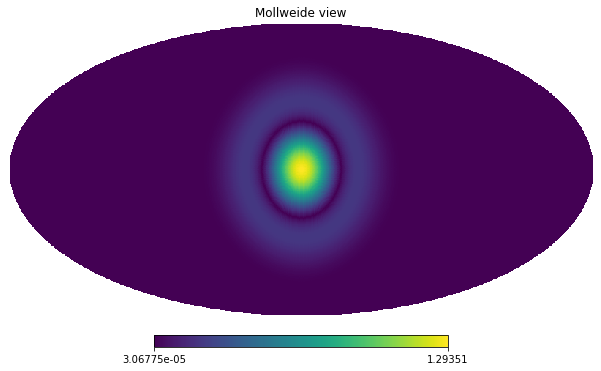

In [25]:
hp.mollview(i1_myother_delta[6], rot= [0,90])

In [26]:
hp.mollview(i1_my_delta[6], rot = [0,90])

NameError: name 'i1_my_delta' is not defined

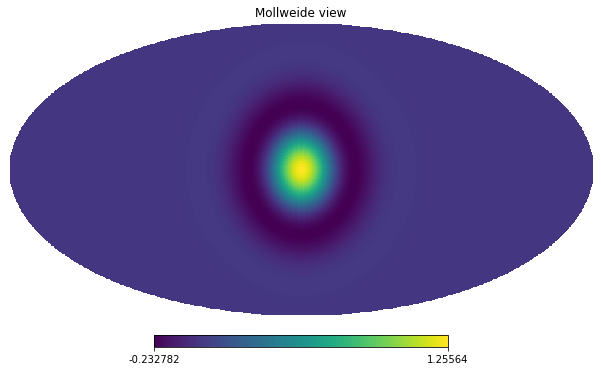

In [29]:
hp.mollview(mor_arr[6], rot = [0,90])

In [87]:
mor_beam = hp.map2alm(mor_arr[7].real)

In [84]:
my_beam = hp.beam2bl(mor_arr[7].real, theta_arr, lmax)

In [85]:
my_beam #*np.sqrt((2*np.arange(0,lmax+1)+1)/4/np.pi)

array([-5.27948845e-17,  5.06012351e-01,  9.47725923e-01,  7.71371525e-01,
        3.14329283e-01,  6.58517749e-02,  6.94916031e-03,  2.44310763e-04,
       -1.89466751e-04, -1.63601237e-04, -1.94830223e-04, -1.71253174e-04,
       -1.91390543e-04, -1.74707903e-04, -1.87557355e-04, -1.75254967e-04,
       -1.85080077e-04, -1.77089407e-04, -1.84753297e-04, -1.79187222e-04,
       -1.84081238e-04, -1.78970836e-04, -1.82487804e-04, -1.78371994e-04,
       -1.81948151e-04, -1.79461106e-04, -1.82312072e-04, -1.80181361e-04,
       -1.81726838e-04, -1.79219685e-04, -1.80675135e-04, -1.78815917e-04,
       -1.80693162e-04, -1.79718639e-04, -1.80958318e-04, -1.79709013e-04,
       -1.80206658e-04, -1.78601204e-04, -1.79471475e-04, -1.78530023e-04,
       -1.79696912e-04, -1.79206846e-04, -1.79692998e-04, -1.78685890e-04,
       -1.78825473e-04, -1.77676048e-04, -1.78357860e-04, -1.77873613e-04,
       -1.78610315e-04, -1.78231842e-04, -1.78305935e-04, -1.77364594e-04,
       -1.77419031e-04, -

In [89]:
mor_beam[:lmax+1]

array([ 5.17229408e-05+0.j,  2.47326474e-01+0.j,  5.97921173e-01+0.j,
        5.75847701e-01+0.j,  2.66164417e-01+0.j,  6.17811091e-02+0.j,
        7.25249695e-03+0.j,  4.63503861e-04+0.j, -1.17140630e-05+0.j,
        1.87417415e-05+0.j, -1.92106758e-05+0.j,  1.28333555e-05+0.j,
       -1.46554375e-05+0.j,  8.70494881e-06+0.j, -1.15098745e-05+0.j,
        5.81200495e-06+0.j, -9.37095624e-06+0.j,  3.76186595e-06+0.j,
       -7.90277870e-06+0.j,  2.27314481e-06+0.j, -6.87874217e-06+0.j,
        1.16242903e-06+0.j, -6.15337059e-06+0.j,  3.10936482e-07+0.j,
       -5.63365723e-06+0.j, -3.58745044e-07+0.j, -5.25819586e-06+0.j,
       -8.97262102e-07+0.j, -4.98532781e-06+0.j, -1.33909520e-06+0.j,
       -4.78728621e-06+0.j, -1.70889648e-06+0.j, -4.64520197e-06+0.j,
       -2.02381740e-06+0.j, -4.54488557e-06+0.j, -2.29555514e-06+0.j,
       -4.47578993e-06+0.j, -2.53317521e-06+0.j, -4.43104809e-06+0.j,
       -2.74401435e-06+0.j, -4.40564203e-06+0.j, -2.93300304e-06+0.j,
       -4.39487329e-

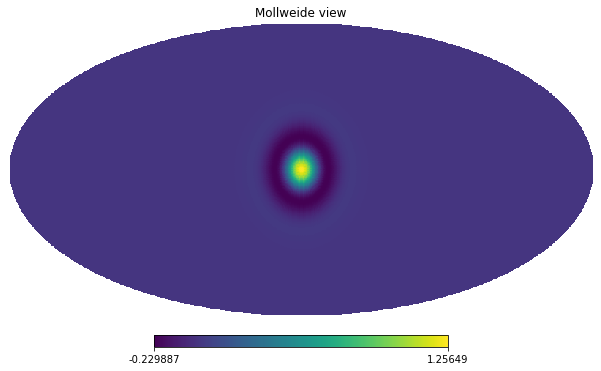

In [37]:
hp.mollview(hp.alm2map(mor_beam, nside), rot = [0,90] )

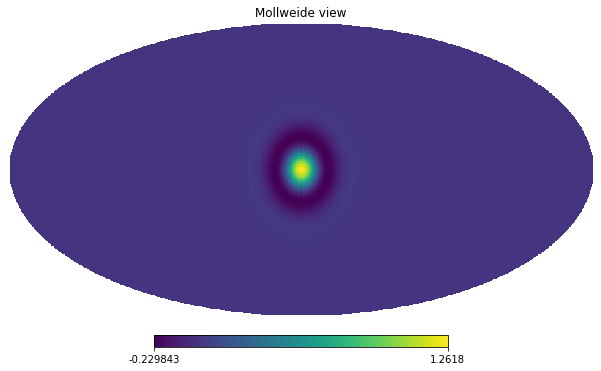

In [36]:
hp.mollview(mor_arr[5], rot = [0,90])